In [5]:
%cd /home/q123/Desktop/explo

import torch 
import gpytorch 
import logging
import logging.config

import yaml


from src.config import insertion_config,insert
from src.helpers import setup_experiment
from src.trainer import Trainer
from src.gibo.optim import GIBOptimizer
from src.optim import BOptimizer

logging.config.fileConfig('logging.conf')
# create root logger
logger = logging.getLogger()

/home/q123/Desktop/explo


In [6]:
## Cartpole

# env_config = {
#         "reward_scale":500,
#         "reward_shift":0,
#         "env_name":"CartPole-v1",
# }

# Swimmer
env_config = {
        "reward_scale":350,
        "reward_shift":0,
        "env_name":"Swimmer-v2",
}

# ## hopper
# env_config = {
#         "reward_scale":1000,
#         "reward_shift":1,
#         "env_name":"Hopper-v2",
# }


In [7]:

n_init = 1

likelihood_config = {
        "noise_hyperprior":gpytorch.priors.torch_priors.UniformPrior(a=0.01,b=0.3),
        "noise_constraint":gpytorch.constraints.constraints.Interval(1e-1,0.3)
        #"noise_constraint":gpytorch.constraints.GreaterThan(0.1)
        }

kernel_config = {

        "kernel_name":"grid",
        
        ### default values 
        "N_max":10e6,
        "ard_num_dims":1000,
        "use_ard":True,
        
        ###### Cartpole
        #"ard_num_dims":5,
        #"N_max":20,

        ###### Hopper
        # "ard_num_dims":36,
        # "N_max":48,
        
        ##### Swimmer
        #"ard_num_dims":18,
        #"N_max":32,
        #########
        
        "lengthscale_hyperprior":gpytorch.priors.torch_priors.GammaPrior(3.0,6.0),
        "lengthscale_constraint":gpytorch.constraints.constraints.GreaterThan(0.001),
        "outputscale_constraint":gpytorch.constraints.constraints.GreaterThan(0.01),
        "outputscale_hyperprior":gpytorch.priors.torch_priors.NormalPrior(loc=2.0,scale=1.0),
        }

trainer_config = {
        "n_steps" :50 ,
        "report_freq":10,
        "save_best":True,
}

optimizer_config = {
        "n_eval":5,
        ### for GIBO
        "n_info_samples":5,
        "delta":0.1,
        "normalize_gradient":True,
        "standard_deviation_scaling":False,
}

MathLog.src.helpers : WARNING : MLP dimensions : [8, 2]


/home/q123/miniconda3/envs/explo/lib/python3.8/site-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment Swimmer-v2 is out of date. You should consider upgrading to version `v3` with the environment ID `Swimmer-v3`.
  logger.warn(


 Using 10000000.0 last points to compute GP
local_y 1.0361478328704834 local_opt tensor([ 0.2683, -0.0379, -0.3616,  0.0220,  0.5068,  0.2522,  0.4989, -0.1447,
        -0.4198,  0.4915])
 intial local opt reward : 1.0321297764778137
Generating data
Done generating data
##############################
covar_lengthscale max 0.5 / min 0.5                  covar_outputscale 1.9999998807907104                 noise 0.20000001788139343
##############################
##############################
covar_lengthscale max 0.3333694636821747 / min 0.33333954215049744                  covar_outputscale 0.010000168345868587                 noise 0.10000000149011612
##############################


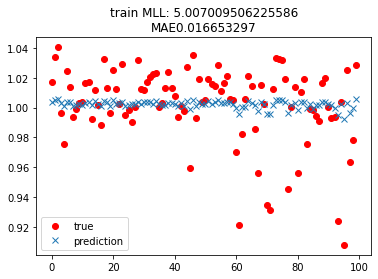

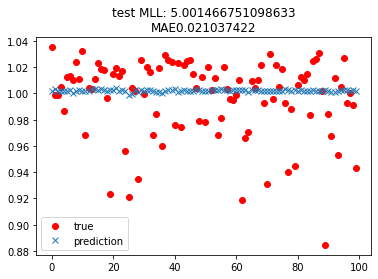

In [8]:
from src.tester import Tester 

model,objective_env = setup_experiment(env_config,kernel_config,likelihood_config,n_init)
tester = Tester(model,objective_env,
                 "/home/q123/Desktop/explo/local_optima/Swimmer-v2",1e-1,
                 n_train=100,n_test=100)

train_data,train_pred,test_data,test_pred,tmp = tester.run()